In [66]:
import pandas as pd
import numpy as np

In [67]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [39]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
import seaborn as sns

<AxesSubplot:xlabel='Survived', ylabel='count'>

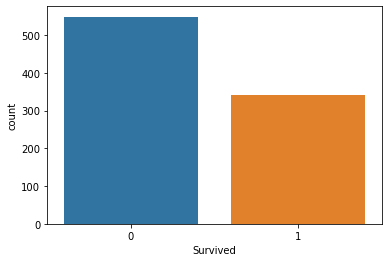

In [19]:
sns.countplot(x="Survived", data= df_train)

In [24]:
df_train.Survived.count()

891

In [28]:
df_train.Survived.sum()

0.3838383838383838

In [29]:
df_train.Survived.sum()/df_train.Survived.count()

0.3838383838383838

In [30]:
df_train.Survived.sum()/df_train.Survived.count()-1

-0.6161616161616161

In [33]:
df_train.groupby(["Survived","Sex"])["Survived"].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

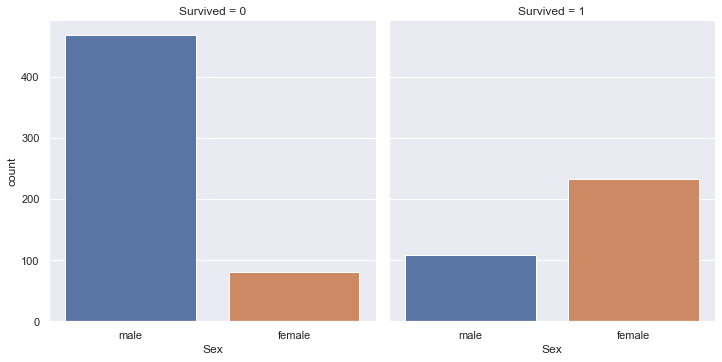

In [39]:
sns.set_theme(style='darkgrid')
sns.catplot(x='Sex', col='Survived',kind='count', data=df_train)

In [51]:
df_train[(df_train['Sex']=='female')].Survived.sum()/ df_train[(df_train['Sex']=='female')].Survived.count()

0.7420382165605095

In [52]:
df_train[(df_train['Sex']=='male')].Survived.sum()/ df_train[(df_train['Sex']=='male')].Survived.count()

0.18890814558058924

In [58]:
df_train[df_train['Sex']=='male']['Survived'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Survived'>

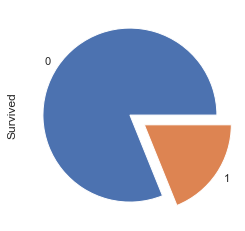

In [63]:
df_train[df_train['Sex']=='male']['Survived'].value_counts().plot.pie(explode=[0,0.2])

<AxesSubplot:ylabel='Survived'>

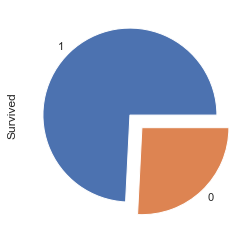

In [67]:
df_train[df_train['Sex']=='female']['Survived'].value_counts().plot.pie(explode=[0,0.2])

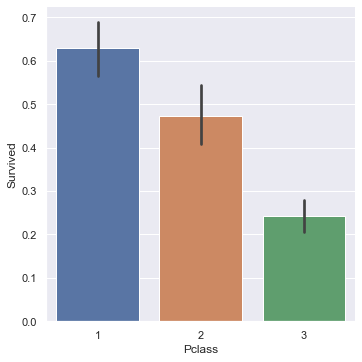

In [74]:
sns.catplot(x='Pclass', y='Survived', kind= 'bar',data= df_train)

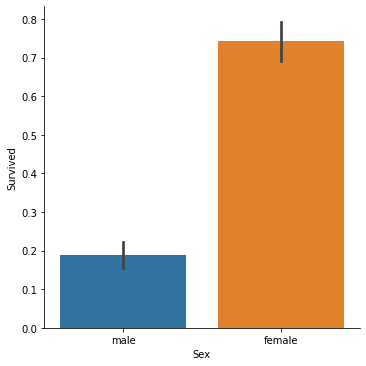

In [40]:
sns.catplot(x='Sex', y='Survived', kind= 'bar',data= df_train)

<AxesSubplot:>

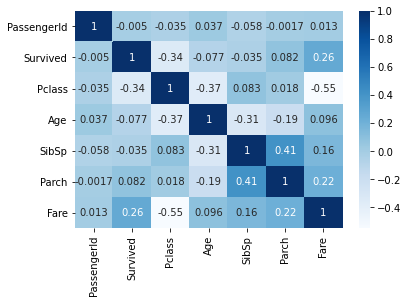

In [18]:
corr=df_train.corr()

sns.heatmap(corr, cmap="Blues", annot=True)

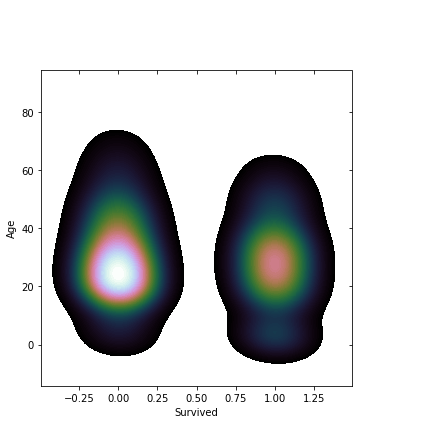

In [36]:
g= sns.JointGrid(data=df_train, x='Survived', y='Age', space=0)
g.plot_joint(sns.kdeplot,
             fill=True,levels=100, cmap="cubehelix")

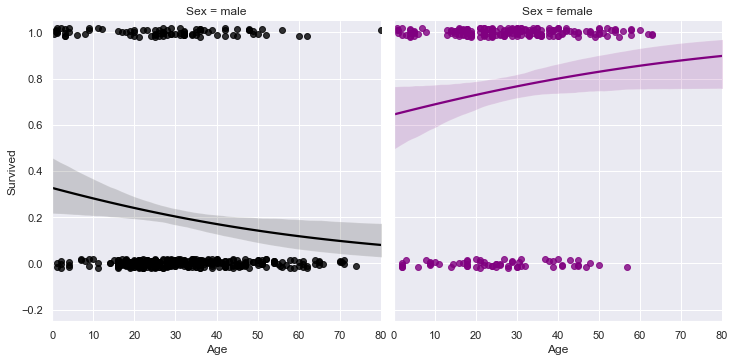

In [51]:
pal = dict(male="black", female="purple")


g = sns.lmplot(x="Age", y="Survived", col="Sex", hue="Sex", data=df_train,
               palette=pal, y_jitter=.02, logistic=True, truncate=False)
g.set(xlim=(0, 80), ylim=(-.25, 1.05))


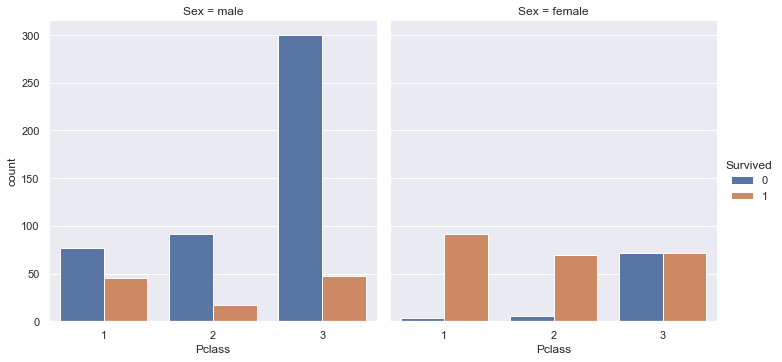

In [50]:
sns.catplot(x='Pclass', hue='Survived', col='Sex',kind='count', data=df_train)

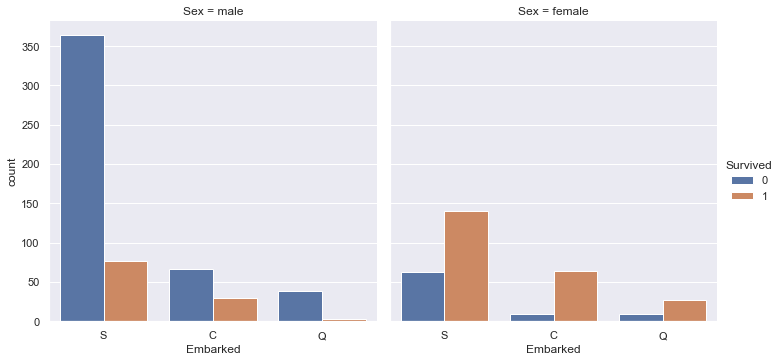

In [55]:
sns.catplot(x='Embarked', hue='Survived', col='Sex',kind='count', data=df_train)

C:\Users\lavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


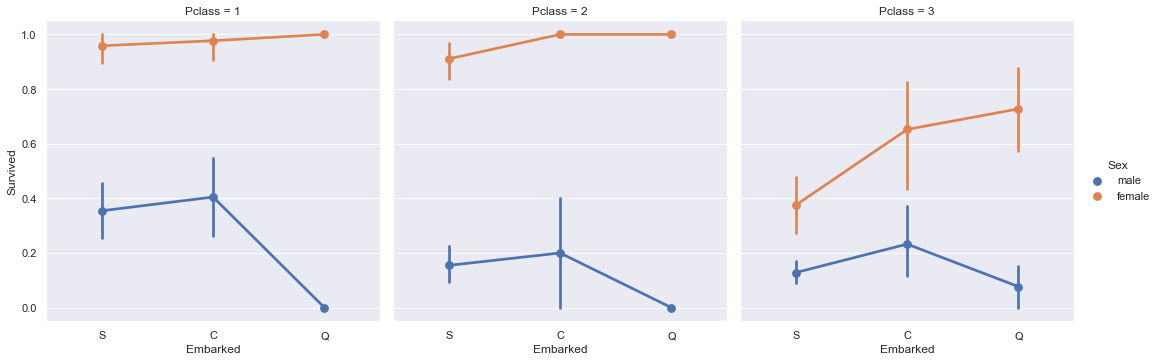

In [64]:
sns.catplot('Embarked','Survived','Sex',col= 'Pclass' ,kind= 'point', data= df_train)

In [68]:
# create new column "Age_bin" for Train and Test DataFrame

for df in [df_train, df_test]:
    df['Age_bin']= np.nan
    for i in range(8,0,-1):
        df.loc[df['Age']<=i*10, 'Age_bin'] = i

In [69]:
df_train['Age_bin']

0      3.0
1      4.0
2      3.0
3      4.0
4      4.0
      ... 
886    3.0
887    2.0
888    NaN
889    3.0
890    4.0
Name: Age_bin, Length: 891, dtype: float64

C:\Users\lavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


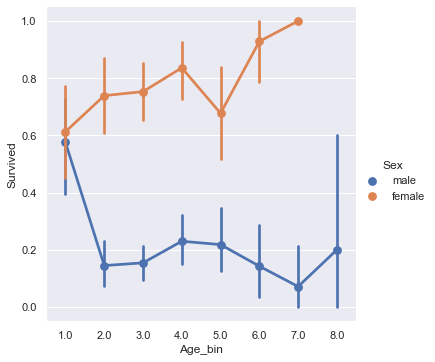

In [70]:
sns.catplot('Age_bin', 'Survived', 'Sex', kind='point', data= df_train)

In [71]:
df_test['Age_bin']

0      4.0
1      5.0
2      7.0
3      3.0
4      3.0
      ... 
413    NaN
414    4.0
415    4.0
416    NaN
417    NaN
Name: Age_bin, Length: 418, dtype: float64

C:\Users\lavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


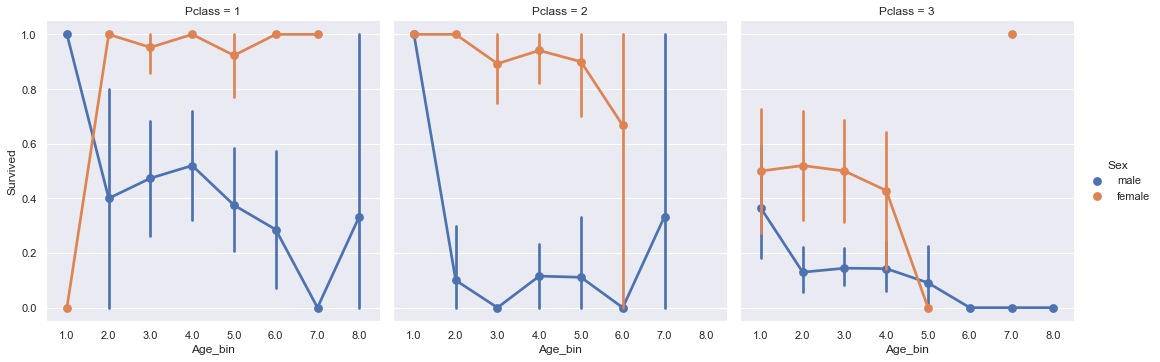

In [72]:
sns.catplot('Age_bin', 'Survived', 'Sex',col= 'Pclass', kind='point', data= df_train)